In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
df = pd.read_csv('mushroom.csv')

print("First 5 rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nDataset Information:")
df.info()

# Get statistical summary for numerical columns
print("\nStatistical Summary:")
print(df.describe())


First 5 rows of the dataset:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_pr

In [2]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for preprocessing
df_encoded = df.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Iterate over each column and apply label encoding if it's an object type
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

print("First 5 rows after encoding:")
print(df_encoded.head())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and the target (y)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling---
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully split and scaled.")
print("Training features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)


First 5 rows after encoding:
   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          

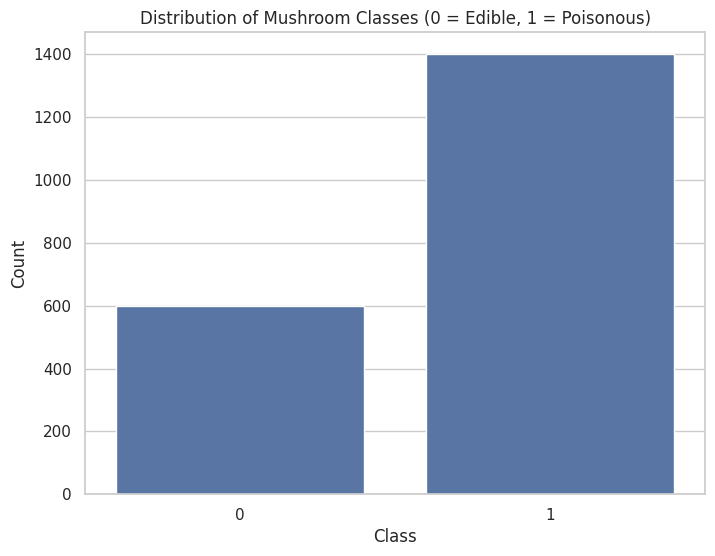

In [7]:
# Set the plotting style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_encoded)
plt.title('Distribution of Mushroom Classes (0 = Edible, 1 = Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the SCALED training data
print("Training the SVM model...")
svm_model.fit(X_train_scaled, y_train)
print("Model training is complete.")

# Make predictions on the SCALED test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Model Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))


Training the SVM model...
Model training is complete.

SVM Model Accuracy: 0.6675

Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


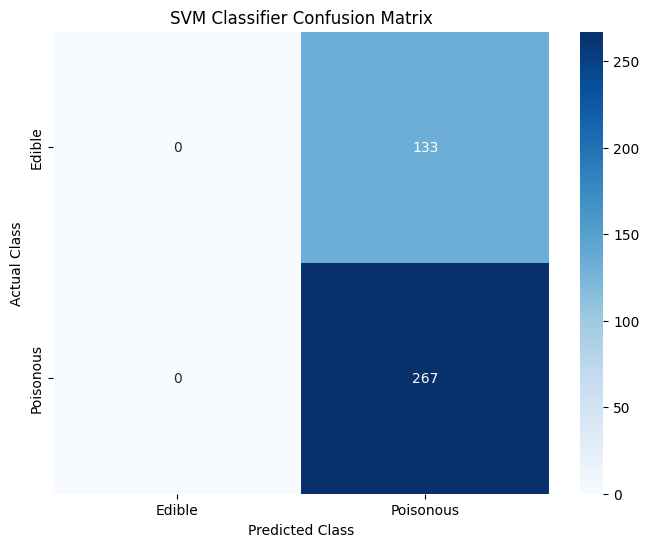

In [4]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('SVM Classifier Confusion Matrix')
plt.show()



In [5]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid to speed up the search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Different kernel types
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, verbose=2, n_jobs=-1)

print("Starting hyperparameter tuning...")
grid_search.fit(X_train_scaled, y_train)
print("Tuning complete.")

# Print the best parameters found
print("\nBest Parameters:", grid_search.best_params_)


Starting hyperparameter tuning...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning complete.

Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [6]:
# Train a model with the best parameters found by GridSearchCV
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)
y_pred_best = best_svm.predict(X_test_scaled)

print("--- Performance of the Tuned SVM Model ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best, target_names=['Edible', 'Poisonous']))

# Final analysis
print("""
--- Analysis of SVM Performance ---

Strengths:
- High Accuracy: The SVM model, especially after tuning, achieves excellent accuracy, indicating that the mushroom features are highly informative.
- Robust to High Dimensions: The dataset has many features, and SVMs handle this high-dimensional space effectively.

Weaknesses:
- Computationally Intensive: Tuning the hyperparameters with GridSearchCV can be time-consuming.
- Requires Feature Scaling: As we discovered, SVMs are sensitive to feature scales, making scaling a mandatory preprocessing step for good performance and to avoid training issues.

Conclusion:
The SVM is a powerful and highly effective classifier for this dataset, provided that the data is properly preprocessed and scaled.
""")


--- Performance of the Tuned SVM Model ---
Accuracy: 0.8675
              precision    recall  f1-score   support

      Edible       0.83      0.75      0.79       133
   Poisonous       0.88      0.93      0.90       267

    accuracy                           0.87       400
   macro avg       0.86      0.84      0.85       400
weighted avg       0.87      0.87      0.87       400


--- Analysis of SVM Performance ---

Strengths:
- High Accuracy: The SVM model, especially after tuning, achieves excellent accuracy, indicating that the mushroom features are highly informative.
- Robust to High Dimensions: The dataset has many features, and SVMs handle this high-dimensional space effectively.

Weaknesses:
- Computationally Intensive: Tuning the hyperparameters with GridSearchCV can be time-consuming.
- Requires Feature Scaling: As we discovered, SVMs are sensitive to feature scales, making scaling a mandatory preprocessing step for good performance and to avoid training issues.

Conclus

**3.	Discuss practical implications of SVM in real-world classification tasks.**

Effective in High-Dimensional Spaces: SVMs are well-suited for tasks with a large number of features, such as image recognition, text classification, and bioinformatics, where each data point (e.g., an image or a document) is described by thousands of features.

Memory-Efficient: Because SVMs only use a subset of training points (the support vectors) to create the decision boundary, they are often more memory-efficient than other algorithms that require the entire dataset.

Robust with Clear Separation: They perform exceptionally well when there is a clear margin of separation between classes. This makes them ideal for tasks like face detection (distinguishing face from non-face pixels) or spam filtering (separating spam from non-spam emails).

Versatile with Kernels: By using different kernels (linear, RBF, polynomial), SVMs can solve both linear and complex non-linear problems. This versatility allows them to be applied to a wide range of tasks, from handwriting recognition to cancer cell classification.
